In [ ]:
#%%

import warnings
warnings.filterwarnings("ignore")
def action_with_warnings():
    warnings.warn("should not appear")
with warnings.catch_warnings(record=True):
    action_with_warnings()

from zipline.api          import (
    set_commission, 
    set_slippage,
    symbol, 
    symbols, 
    schedule_function, 
    order_target_percent,
)
from zipline.finance      import slippage   as slippage_lib
from zipline.finance      import commission as commission_lib
from zipline.utils.events import date_rules, time_rules
from zipline              import run_algorithm
import pandas             as pd
import numpy              as np
import quantstats         as qs
import matplotlib.pyplot  as plt

In [ ]:
#%%

class CustomCostModel(commission_lib.CommissionModel):
    def __init__(self, buy_cost, sell_cost):
        self.buy_cost  = buy_cost
        self.sell_cost = sell_cost
    def calculate(self, order, transaction):
        if transaction.amount > 0:
            cost = self.buy_cost
        else:
            cost = self.sell_cost
        return abs(transaction.amount)*cost


def initialize(context):
    context.assets = symbols(
        'JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 
        'JPM', 'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 
        'PCAR', 'TXT', 'TMO', 'DE', 'MSFT', 'HPQ', 
        'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA'
    )
    context.dataset_start = None
    set_slippage(slippage_lib.FixedSlippage(spread=0.0011))
    set_commission(CustomCostModel(buy_cost=0.0036, sell_cost=0.0081))
    schedule_function(rebalance, date_rules.week_start(), time_rules.market_open())

def rebalance(context, data):
    if context.dataset_start is None:
        context.dataset_start = data.current_dt
        print(context.dataset_start)
    weight = 1.0 / len(context.assets)
    for asset in context.assets:
        order_target_percent(asset, weight)
    
def handle_data(context, data):
    pass

[2024-05-20 10:14:02.302258] INFO: Norgate Data: NorgateData package v1.0.74: Init complete
[2024-05-20 10:14:02.305258] INFO: Norgate Data: Zipline v3.0.4 detected
[2024-05-20 10:14:02.305258] INFO: Norgate Data: Zipline_norgatedata package v3.0.3: Init complete
2000-01-03 21:00:00+00:00


Cannot place order for JCI, as it has de-listed. Any existing positions for this asset will be liquidated on 2018-03-28 00:00:00.
Cannot place order for TGT, as it has de-listed. Any existing positions for this asset will be liquidated on 2018-03-28 00:00:00.
Cannot place order for CMCSA, as it has de-listed. Any existing positions for this asset will be liquidated on 2018-03-28 00:00:00.
Cannot place order for CPB, as it has de-listed. Any existing positions for this asset will be liquidated on 2018-03-28 00:00:00.
Cannot place order for MO, as it has de-listed. Any existing positions for this asset will be liquidated on 2018-03-28 00:00:00.
Cannot place order for APA, as it has de-listed. Any existing positions for this asset will be liquidated on 2018-03-28 00:00:00.
Cannot place order for MMC, as it has de-listed. Any existing positions for this asset will be liquidated on 2018-03-28 00:00:00.
Cannot place order for JPM, as it has de-listed. Any existing positions for this asset wi

<Axes: >

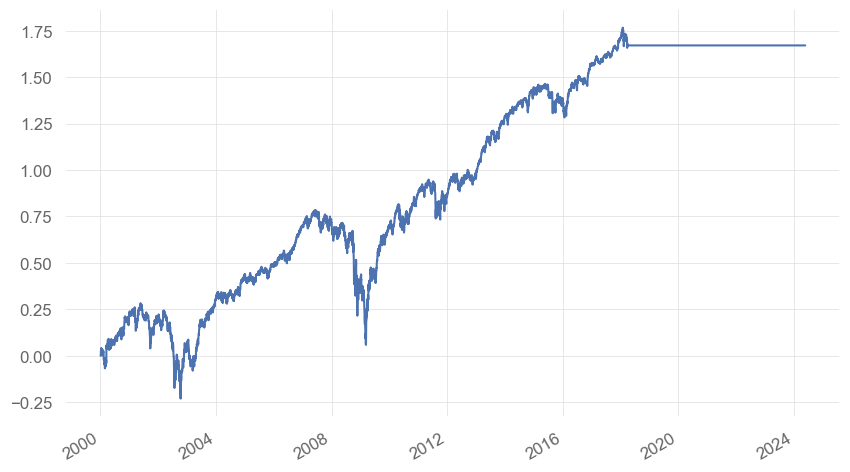

In [ ]:
#%%

start_date = pd.Timestamp('2000-01-01')
end_date   = pd.Timestamp('2024-05-20')

results = run_algorithm(
    start          = start_date,
    end            = end_date,
    initialize     = initialize,
    handle_data    = handle_data,
    capital_base   = 10000,
    data_frequency = 'daily',
    bundle         = 'quandl', #'norgatedata-sp500'
)

results['returns'].cumsum().plot()

                    Strategy
------------------  ----------
Start Period        2000-01-03
End Period          2024-05-20
Risk-Free Rate      0.0%
Time in Market      75.0%

Cumulative Return   278.57%
CAGR﹪              3.84%

Sharpe              0.41
Prob. Sharpe Ratio  97.86%
Sortino             0.58
Sortino/√2          0.41
Omega               1.09

Max Drawdown        -56.63%
Longest DD Days     2303

Gain/Pain Ratio     0.09
Gain/Pain (1M)      0.59

Payoff Ratio        0.96
Profit Factor       1.09
Common Sense Ratio  1.07
CPC Index           0.56
Tail Ratio          0.98
Outlier Win Ratio   6.06
Outlier Loss Ratio  3.71

MTD                 0.0%
3M                  0.0%
6M                  0.0%
YTD                 0.0%
1Y                  0.0%
3Y (ann.)           0.0%
5Y (ann.)           0.0%
10Y (ann.)          2.13%
All-time (ann.)     3.84%

Avg. Drawdown       -2.28%
Avg. Drawdown Days  42
Recovery Factor     2.95
Ulcer Index         0.13
Serenity Index      0.58


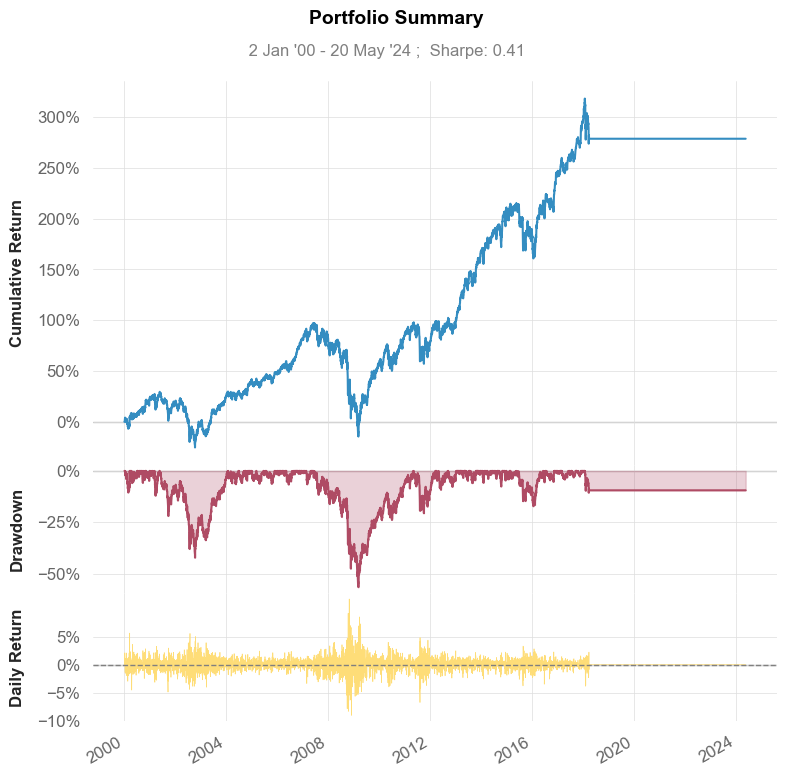

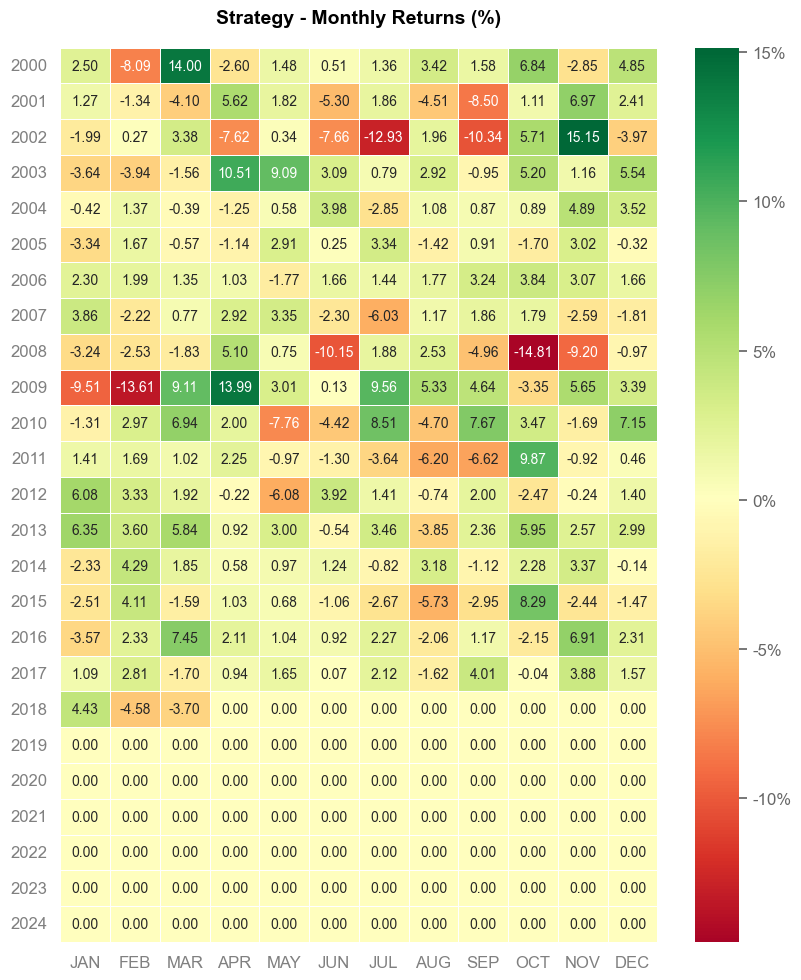

In [ ]:
#%%

qs.reports.basic(results['returns'])

2000-01-03 21:00:00+00:00


Cannot place order for JCI, as it has de-listed. Any existing positions for this asset will be liquidated on 2024-05-17 00:00:00.
Cannot place order for TGT, as it has de-listed. Any existing positions for this asset will be liquidated on 2024-05-17 00:00:00.
Cannot place order for CMCSA, as it has de-listed. Any existing positions for this asset will be liquidated on 2024-05-17 00:00:00.
Cannot place order for CPB, as it has de-listed. Any existing positions for this asset will be liquidated on 2024-05-17 00:00:00.
Cannot place order for MO, as it has de-listed. Any existing positions for this asset will be liquidated on 2024-05-17 00:00:00.
Cannot place order for APA, as it has de-listed. Any existing positions for this asset will be liquidated on 2024-05-17 00:00:00.
Cannot place order for MMC, as it has de-listed. Any existing positions for this asset will be liquidated on 2024-05-17 00:00:00.
Cannot place order for JPM, as it has de-listed. Any existing positions for this asset wi

<Axes: >

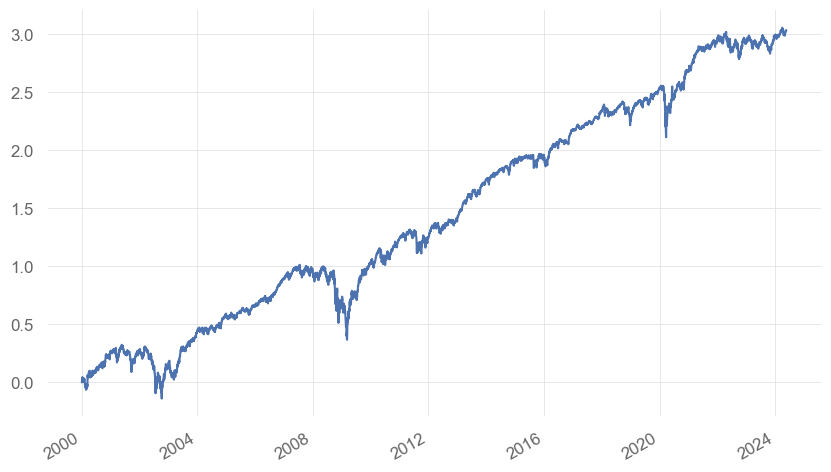

In [ ]:
#%%

start_date = pd.Timestamp('2000-01-01')
end_date   = pd.Timestamp('2024-05-20')

results = run_algorithm(
    start          = start_date,
    end            = end_date,
    initialize     = initialize,
    handle_data    = handle_data,
    capital_base   = 10000,
    data_frequency = 'daily',
    bundle         = 'norgatedata-sp500' # 'quandl'
)

results['returns'].cumsum().plot()

                    Strategy
------------------  ----------
Start Period        2000-01-03
End Period          2024-05-20
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   1,212.37%
CAGR﹪              7.56%

Sharpe              0.64
Prob. Sharpe Ratio  99.92%
Sortino             0.91
Sortino/√2          0.65
Omega               1.13

Max Drawdown        -53.02%
Longest DD Days     1181

Gain/Pain Ratio     0.13
Gain/Pain (1M)      0.8

Payoff Ratio        0.97
Profit Factor       1.13
Common Sense Ratio  1.12
CPC Index           0.59
Tail Ratio          0.99
Outlier Win Ratio   4.25
Outlier Loss Ratio  4.13

MTD                 4.51%
3M                  4.26%
6M                  12.58%
YTD                 4.36%
1Y                  12.64%
3Y (ann.)           3.42%
5Y (ann.)           7.04%
10Y (ann.)          7.73%
All-time (ann.)     7.56%

Avg. Drawdown       -2.15%
Avg. Drawdown Days  25
Recovery Factor     5.72
Ulcer Index         0.11
Serenity Index      1.73

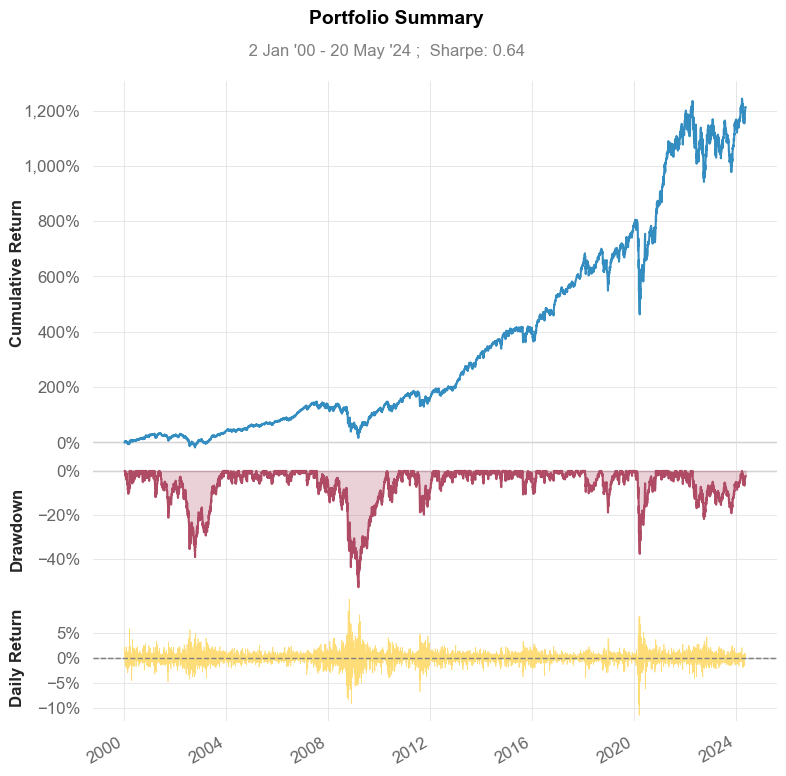

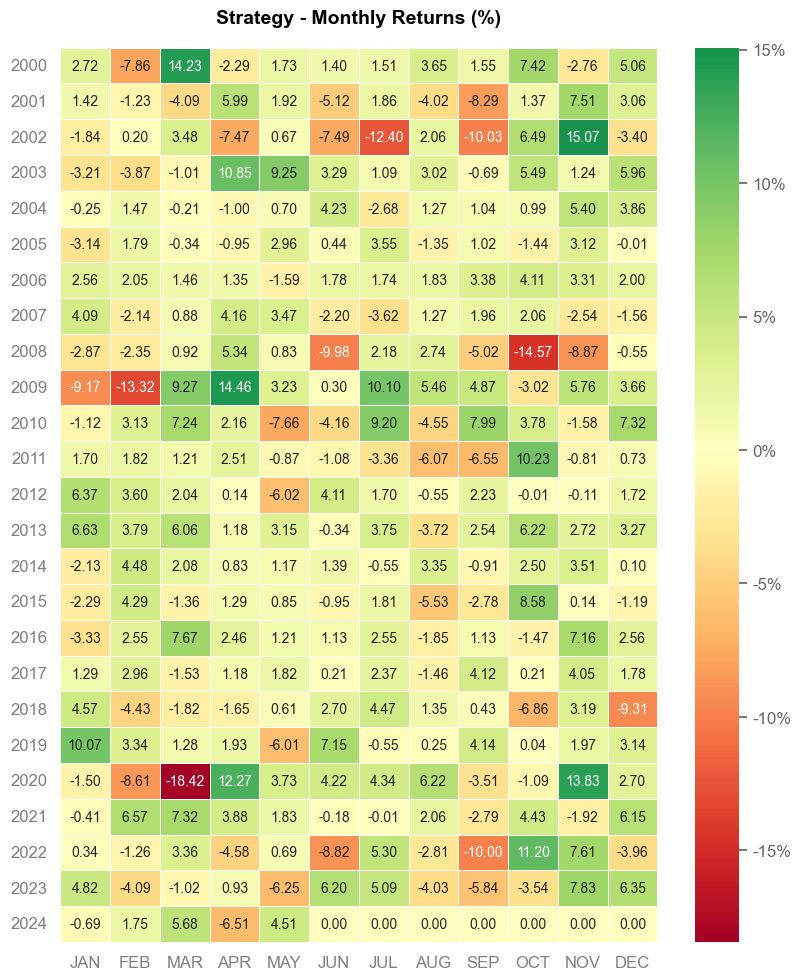

In [ ]:
#%%

qs.reports.basic(results['returns'])